https://machinelearningmastery.com/autoencoder-for-classification/

In [1]:
# Synthectic classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.utils import plot_model

from matplotlib import pyplot

In [2]:
# Define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)

In [3]:
# Summarize the dataset
print(X.shape, y.shape)

(1000, 100) (1000,)


In [4]:
# Split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)

In [5]:
# Scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [6]:
# Number input columns
n_inputs = X.shape[1]

In [7]:
# Define encoder
visible = Input(shape=(n_inputs,))

# Encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# Encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

In [8]:
# Bottleneck
# n_bottleneck = n_inputs
n_bottleneck = round(float(n_inputs)/2.0)
bottleneck = Dense(n_bottleneck)(e)

In [9]:
# Define decoder level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# Define decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [10]:
# Output layer
output = Dense(n_inputs, activation='linear')(d)

In [11]:
# Define autoencoder model
model = Model(inputs=visible, outputs=output)

In [12]:
# Compile autoencoder model
model.compile(optimizer='adam', loss='mse')

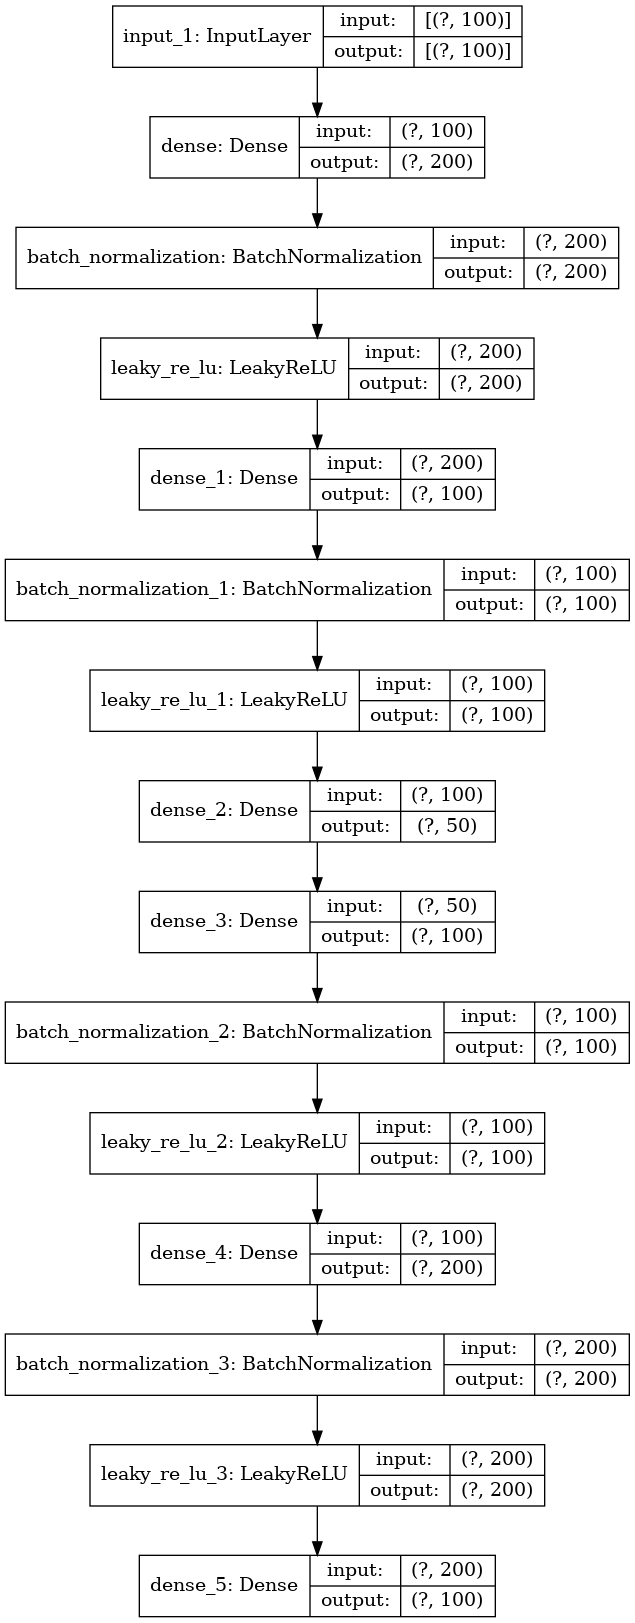

In [13]:
# Plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

In [14]:
# Fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test, X_test))

Epoch 1/200
42/42 - 0s - loss: 0.2507 - val_loss: 0.1749
Epoch 2/200
42/42 - 0s - loss: 0.0386 - val_loss: 0.1159
Epoch 3/200
42/42 - 0s - loss: 0.0230 - val_loss: 0.0639
Epoch 4/200
42/42 - 0s - loss: 0.0187 - val_loss: 0.0348
Epoch 5/200
42/42 - 0s - loss: 0.0165 - val_loss: 0.0212
Epoch 6/200
42/42 - 0s - loss: 0.0139 - val_loss: 0.0142
Epoch 7/200
42/42 - 0s - loss: 0.0137 - val_loss: 0.0110
Epoch 8/200
42/42 - 0s - loss: 0.0120 - val_loss: 0.0091
Epoch 9/200
42/42 - 0s - loss: 0.0112 - val_loss: 0.0090
Epoch 10/200
42/42 - 0s - loss: 0.0114 - val_loss: 0.0059
Epoch 11/200
42/42 - 0s - loss: 0.0092 - val_loss: 0.0070
Epoch 12/200
42/42 - 0s - loss: 0.0097 - val_loss: 0.0058
Epoch 13/200
42/42 - 0s - loss: 0.0096 - val_loss: 0.0054
Epoch 14/200
42/42 - 0s - loss: 0.0095 - val_loss: 0.0052
Epoch 15/200
42/42 - 0s - loss: 0.0084 - val_loss: 0.0044
Epoch 16/200
42/42 - 0s - loss: 0.0083 - val_loss: 0.0057
Epoch 17/200
42/42 - 0s - loss: 0.0086 - val_loss: 0.0060
Epoch 18/200
42/42 - 0s

Epoch 142/200
42/42 - 0s - loss: 0.0039 - val_loss: 0.0018
Epoch 143/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0015
Epoch 144/200
42/42 - 0s - loss: 0.0038 - val_loss: 0.0021
Epoch 145/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0014
Epoch 146/200
42/42 - 0s - loss: 0.0033 - val_loss: 0.0013
Epoch 147/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0015
Epoch 148/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0014
Epoch 149/200
42/42 - 0s - loss: 0.0034 - val_loss: 0.0014
Epoch 150/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0016
Epoch 151/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0020
Epoch 152/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0014
Epoch 153/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0015
Epoch 154/200
42/42 - 0s - loss: 0.0039 - val_loss: 0.0021
Epoch 155/200
42/42 - 0s - loss: 0.0039 - val_loss: 0.0019
Epoch 156/200
42/42 - 0s - loss: 0.0040 - val_loss: 0.0027
Epoch 157/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0020
Epoch 158/200
42/42 - 0s - loss: 0.0038 - val_loss: 0.00

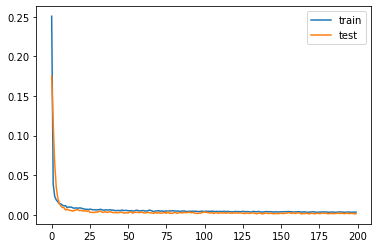

In [15]:
# Plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [16]:
# Define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)

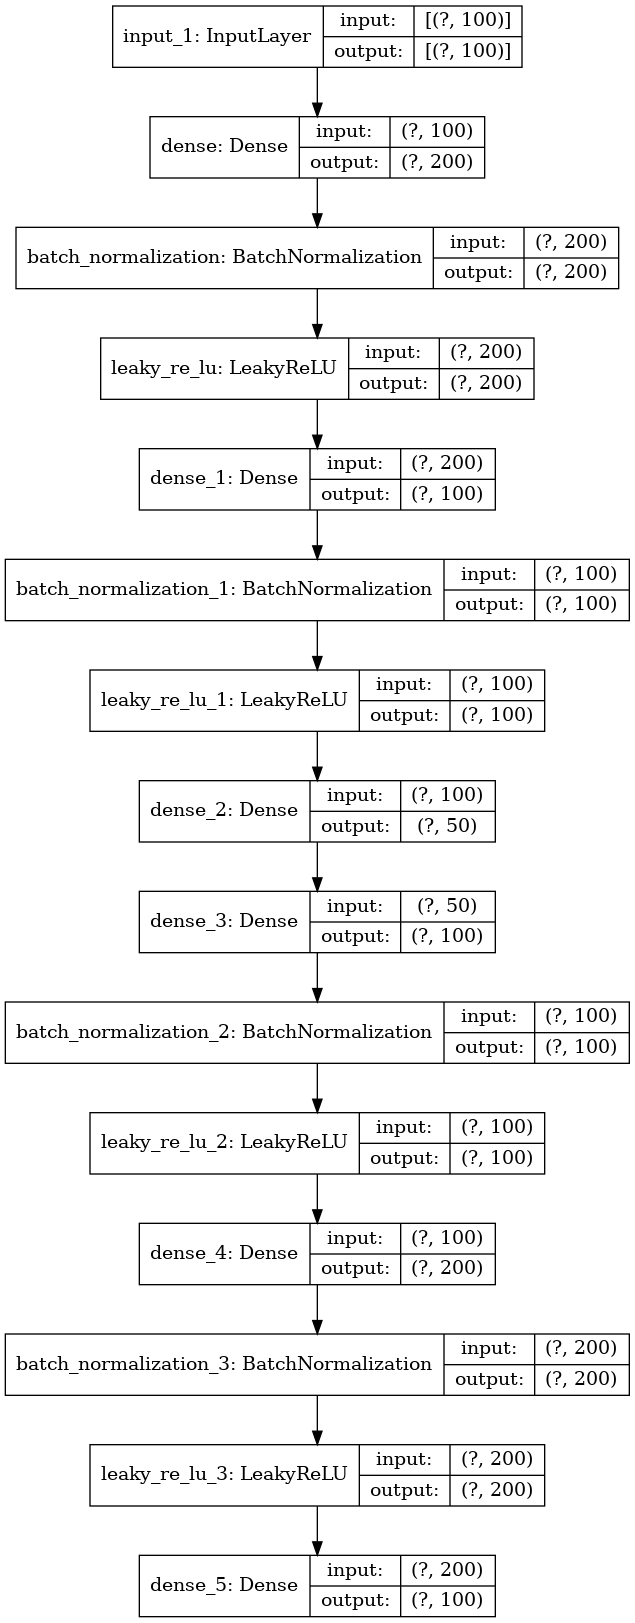

In [17]:
# Plot the encoder
plot_model(model, 'encoder_no_compress.png', show_shapes=True)

In [18]:
# Save the encoder to file
encoder.save('encoder.h5')